# Ex 1a.

In [11]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

## Incarcare date

In [12]:

data = pd.read_csv("date_alegeri_turul2.csv")

VOT = data['Vot'].values
AGE = data['Varsta'].values
SEX = data['Sex'].values
EDU = data['Educatie'].values
INC = data['Venit'].values

## Normalizare Date

In [13]:
AGE_mean, AGE_std = AGE.mean(), AGE.std()
SEX_mean, SEX_std = SEX.mean(), SEX.std()
EDU_mean, EDU_std = EDU.mean(), EDU.std()
INC_mean, INC_std = INC.mean(), INC.std()

AGE_std_data = (AGE - AGE_mean) / AGE_std
SEX_std_data = (SEX - SEX_mean) / SEX_std
EDU_std_data = (EDU - EDU_mean) / EDU_std
INC_std_data = (INC - INC_mean) / INC_std

## Construire Model

In [14]:
with pm.Model() as model:
    beta0 = pm.Normal('beta0', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    beta4 = pm.Normal('beta4', mu=0, sigma=10)

    logits = beta0 + beta1 * AGE_std_data + beta2 * SEX_std_data + beta3 * EDU_std_data + beta4 * INC_std_data
    p = pm.math.sigmoid(logits)

    y_obs = pm.Bernoulli('y_obs', p=p, observed=VOT)

    trace=pm.sample(3000, tune=2000, target_accept=0.95, return_inferencedata=True)

print(az.summary(trace, var_names=["beta0", "beta1", "beta2", "beta3", "beta4"]))

Output()

Output()

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta0  1.741  0.147   1.468    2.014      0.002    0.001    5101.0    4067.0   
beta1  0.290  0.131   0.059    0.550      0.002    0.001    6847.0    4017.0   
beta2 -0.426  0.128  -0.670   -0.186      0.002    0.001    6737.0    4266.0   
beta3  0.487  0.131   0.233    0.724      0.002    0.001    7372.0    3722.0   
beta4  1.010  0.143   0.737    1.272      0.002    0.001    5334.0    4583.0   

       r_hat  
beta0    1.0  
beta1    1.0  
beta2    1.0  
beta3    1.0  
beta4    1.0  


# Ex 1b

Comparand mean-ul de la toti beta (in afara de beta0), vedem ca beta3 si beta4 sunt cele mai semnificative.
Asadar, variabilele asociate vor influenta cel mai mult rezultatul: Educatie & Venit.

# Ex 1c

In [15]:
data = pd.read_csv("date_alegeri_turul2.csv")

VOT = data['Vot'].values
EDU = data['Educatie'].values
INC = data['Venit'].values

EDU_mean, EDU_std = EDU.mean(), EDU.std()
INC_mean, INC_std = INC.mean(), INC.std()

EDU_std_data = (EDU - EDU_mean) / EDU_std
INC_std_data = (INC - INC_mean) / INC_std


with pm.Model() as model:
    beta0 = pm.Normal('beta0', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    beta4 = pm.Normal('beta4', mu=0, sigma=10)


    logits = beta0 + beta3 * EDU_std_data + beta4 * INC_std_data
    p = pm.math.sigmoid(logits)

    y_obs = pm.Bernoulli('y_obs', p=p, observed=VOT)

    trace=pm.sample(3000, tune=2000, target_accept=0.95, return_inferencedata=True)

print(az.summary(trace, var_names=["beta0", "beta3", "beta4"]))






Output()

Output()

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta0  1.661  0.140   1.403    1.919      0.002    0.001    4661.0    4546.0   
beta3  0.482  0.123   0.258    0.720      0.002    0.001    4836.0    3686.0   
beta4  1.009  0.139   0.744    1.266      0.002    0.002    4493.0    3930.0   

       r_hat  
beta0    1.0  
beta3    1.0  
beta4    1.0  


# Ex 2 - Sepal Length

In [20]:
iris = pd.read_csv('iris.csv')
iris.head()

df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    idata_0 = pm.sample(1000, return_inferencedata=True)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


([<matplotlib.axis.XTick at 0x7ec3c07c4d10>,
 [Text(-1.5, 0, '4.0'),
  Text(-1.0, 0, '4.5'),
  Text(-0.5, 0, '5.0'),
  Text(0.0, 0, '5.5'),
  Text(0.5, 0, '6.0'),
  Text(1.0, 0, '6.5'),
  Text(1.5, 0, '7.0'),
  Text(2.0, 0, '7.5')])

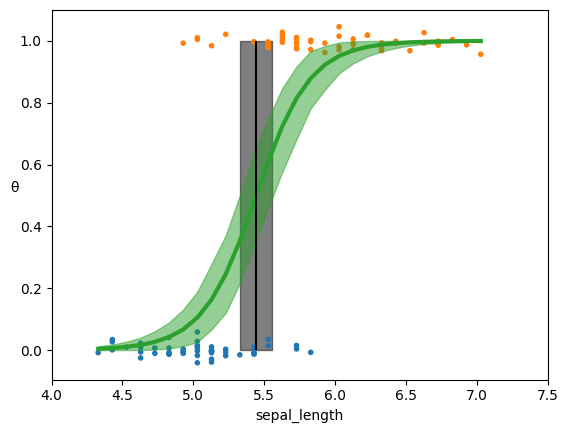

In [21]:
posterior_0 = idata_0.posterior.stack(samples=("chain", "draw"))
theta = posterior_0['θ'].mean("samples")
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(posterior_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hdi(posterior_0['bd'].values)
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, posterior_0['θ'].T, color='C2', smooth=False)
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

# Ex 2 - Sepal Width

In [22]:
iris = pd.read_csv('iris.csv')
iris.head()

df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_width'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    idata_0 = pm.sample(1000, return_inferencedata=True)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


([<matplotlib.axis.XTick at 0x7ec3bf0cdf90>,
 [Text(-1.5, 0, '1.6'),
  Text(-1.0, 0, '2.1'),
  Text(-0.5, 0, '2.6'),
  Text(0.0, 0, '3.1'),
  Text(0.5, 0, '3.6'),
  Text(1.0, 0, '4.1'),
  Text(1.5, 0, '4.6')])

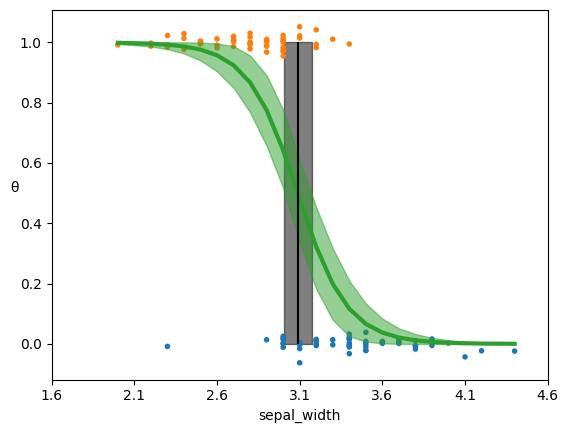

In [23]:
posterior_0 = idata_0.posterior.stack(samples=("chain", "draw"))
theta = posterior_0['θ'].mean("samples")
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(posterior_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hdi(posterior_0['bd'].values)
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, posterior_0['θ'].T, color='C2', smooth=False)
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

# Ex 2 - Petal Length

In [24]:
iris = pd.read_csv('iris.csv')
iris.head()

df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'petal_length'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    idata_0 = pm.sample(1000, return_inferencedata=True)

Output()

Output()

ERROR:pymc.stats.convergence:There were 579 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


([<matplotlib.axis.XTick at 0x7ec3bca06250>,
 [Text(-3.0, 0, '-0.1'),
  Text(-2.0, 0, '0.9'),
  Text(-1.0, 0, '1.9'),
  Text(0.0, 0, '2.9'),
  Text(1.0, 0, '3.9'),
  Text(2.0, 0, '4.9'),
  Text(3.0, 0, '5.9')])

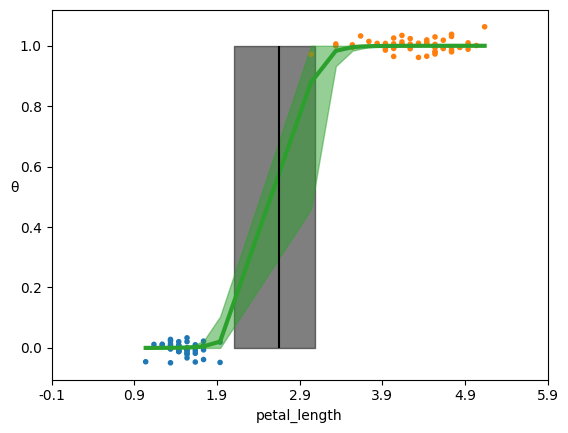

In [25]:
posterior_0 = idata_0.posterior.stack(samples=("chain", "draw"))
theta = posterior_0['θ'].mean("samples")
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(posterior_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hdi(posterior_0['bd'].values)
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, posterior_0['θ'].T, color='C2', smooth=False)
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

# Ex 2 - Petal Width

In [26]:
iris = pd.read_csv('iris.csv')
iris.head()

df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'petal_width'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    idata_0 = pm.sample(1000, return_inferencedata=True)

Output()

Output()

ERROR:pymc.stats.convergence:There were 109 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


([<matplotlib.axis.XTick at 0x7ec3bc6a2f90>,
 [Text(-1.0, 0, '-0.2'),
  Text(-0.75, 0, '0.0'),
  Text(-0.5, 0, '0.3'),
  Text(-0.25, 0, '0.5'),
  Text(0.0, 0, '0.8'),
  Text(0.25, 0, '1.0'),
  Text(0.5, 0, '1.3'),
  Text(0.75, 0, '1.5'),
  Text(1.0, 0, '1.8'),
  Text(1.25, 0, '2.0')])

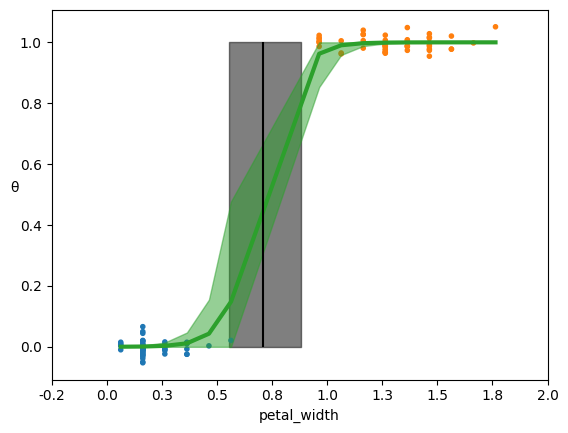

In [27]:
posterior_0 = idata_0.posterior.stack(samples=("chain", "draw"))
theta = posterior_0['θ'].mean("samples")
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(posterior_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hdi(posterior_0['bd'].values)
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, posterior_0['θ'].T, color='C2', smooth=False)
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))